In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('../data_processeing/Yelp_Cuisine_Chinese.pkl')

In [15]:
df_chi = df[df['cuisine_Chinese'] == 2]

In [8]:
df.columns

Index([                          u'address',
                              u'attributes',
                             u'business_id',
                              u'categories',
                                    u'city',
                                   u'hours',
                                 u'is_open',
                                u'latitude',
                               u'longitude',
                                    u'name',
                            u'neighborhood',
                             u'postal_code',
                            u'review_count',
                                   u'stars',
                                   u'state',
                                    u'type',
                        u'AcceptsInsurance',
                             u'AgesAllowed',
                                 u'Alcohol',
                         u'Ambience_casual',
                         u'Ambience_classy',
                          u'Ambience_divey',
          

In [20]:
df_chi['neighborhood']

q_KQbgnaYDlPx8EHTydcBQ              Brown's Corners
2px99IppAcnxR238eq_8_w                             
TkXbFJtFCdM_WTLkHa6Erw                             
dYmm5468BdWxWgksXpy2TQ                             
OS5IyYEXgYV9_Z0iS4MkOw                 St. Lawrence
01aNlDhbMObjc9OdAHuNpQ                             
KeQ1cK564cL5C_hBTFrqnA           Mississauga Valley
ZcMRFFuvFt5gH2hdnpyigg    Rosemont-La Petite-Patrie
1uPQTz5XZSWr0ti7kUpaDw                  Ville-Marie
oWDLyENvjBa5LZdRGGOrow                             
3PhF188adiC8ZutKRP9gyQ                             
rb4d1_OtpVD91J5NDp4Y3w                    South End
cXdQ3H0GqcIzRgrvBEaBxw                             
-GDfRHphXjccSWhliFHnzg                             
ls3r7doDW0p65cwMWxEIdQ                  Scarborough
VzUo-RURV3VnfNItAYM8yg                Spring Valley
98gLNkYYJCg4f_uJ7o2wBg                Plaza Midwood
3GfdCuI0YCc5U3rLLLPHUw                             
N7wlv3nrhDPuDDY8yX6QvQ                             
H_eO04NZAQID

In [18]:
X = df_chi.iloc[:, 16:-1]

In [48]:
y = df_chi['stars']

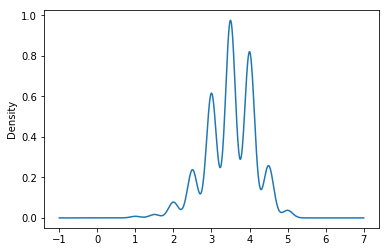

In [49]:
y.plot(kind='kde')

In [31]:
X = pd.get_dummies(X, dummy_na=False, drop_first=True)

In [50]:
y.value_counts()

3.5    862
4.0    725
3.0    544
4.5    228
2.5    210
2.0     69
5.0     33
1.5     15
1.0      7
Name: stars, dtype: int64

In [35]:
X.sum().sort_values()

HairSpecializesIn_straightperms_True         1
BusinessParking_validated_True               1
GoodForDancing_True                          1
Ambience_intimate_True                       2
GoodForKids_True                             2
CoatCheck_True                               2
Ambience_romantic_formal                     3
DietaryRestrictions_vegan_True               3
DietaryRestrictions_dairy-free_True          4
ByAppointmentOnly_True                       4
Music_live_True                              4
RestaurantsReservations_True                 5
HairSpecializesIn_africanamerican_True       6
Open24Hours_True                             7
BestNights_thursday_yes_corkage              7
BestNights_saturday_True                     7
BusinessAcceptsBitcoin_True                  8
Ambience_trendy_True                         8
RestaurantsTakeOut_True                      8
BestNights_monday_True                      10
BestNights_tuesday_True                     11
Music_jukebox

In [51]:
def good_bad(x):
    if x >= 4.0:
        return 1
    else:
        return 0
y = y.apply(good_bad)

In [52]:
y

q_KQbgnaYDlPx8EHTydcBQ    0
2px99IppAcnxR238eq_8_w    1
TkXbFJtFCdM_WTLkHa6Erw    0
dYmm5468BdWxWgksXpy2TQ    0
OS5IyYEXgYV9_Z0iS4MkOw    0
01aNlDhbMObjc9OdAHuNpQ    1
KeQ1cK564cL5C_hBTFrqnA    1
ZcMRFFuvFt5gH2hdnpyigg    0
1uPQTz5XZSWr0ti7kUpaDw    1
oWDLyENvjBa5LZdRGGOrow    0
3PhF188adiC8ZutKRP9gyQ    0
rb4d1_OtpVD91J5NDp4Y3w    1
cXdQ3H0GqcIzRgrvBEaBxw    1
-GDfRHphXjccSWhliFHnzg    0
ls3r7doDW0p65cwMWxEIdQ    0
VzUo-RURV3VnfNItAYM8yg    1
98gLNkYYJCg4f_uJ7o2wBg    0
3GfdCuI0YCc5U3rLLLPHUw    1
N7wlv3nrhDPuDDY8yX6QvQ    0
H_eO04NZAQIDcbtFQ4BUag    1
f5xm2RiwLv0gbmXU4BkrGA    1
7sMxjqfidcS1VTqdXBWhnA    0
NiviplzqF1RtwLvYnL79fQ    1
0BEaW7yAystJ2OG-S0jv-Q    0
2xbxXWeu3tpZEJdGTTGbLg    1
q0oPX1DXW86QytTvvrD9MA    1
0C6uuZBD7xKS-uucgwoyQw    1
N3zuaqGESF5iZsi_md9c1Q    1
KUI1j3pYVVQ6ddLqTS0GWw    0
qMJCVx6-ZYvZQHlfrZ_cug    1
                         ..
R8Mw0iFenJ3nwXuZb7Ql4A    0
u6JJojkbqVlVI4NqKsL54Q    1
5XX1w4WbwSlrACQ5vKuLDw    1
B6xVgae6x4Xm5wVNrxaHiw    0
DIxgItsSI9QwX9H8lVpt

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [76]:
def RF_model(X, y, test_size, random_state_split, random_state_model, n_estimators):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state_model)
    rf = rf.fit(X_train, y_train)
    y_predict = rf.predict(X_test)
    return roc_auc_score(y_test, y_predict)

In [86]:
RF_model(X, y, test_size=0.33, random_state_split=1, random_state_model=1, n_estimators=100)

0.57762115757407917